# PyScanCf Example 1
- author: @syedhamidali
- date: Apr 15, 2023

In [2]:
import pyscancf as pcf
import pyart
import glob
print(pcf.__version__)

1.0.24


Setup the paths for the input and output data, `!ls $inp` shows the raw IMD data files, this is how the B-type (short range - high resolution) IMD DWR data looks like.

In [3]:
inp = "/Users/syed44/Downloads/Git_Stuff/imd_temp_radar/B/"
out = "/Users/syed44/Downloads/Git_Stuff/imd_temp_radar/out/"
!ls $inp

GOA210516024101-IMD-B.nc   GOA210516030244-IMD-B.nc
GOA210516024101-IMD-B.nc.1 GOA210516030244-IMD-B.nc.1
GOA210516024101-IMD-B.nc.2 GOA210516030244-IMD-B.nc.2
GOA210516024101-IMD-B.nc.3 GOA210516030244-IMD-B.nc.3
GOA210516024101-IMD-B.nc.4 GOA210516030244-IMD-B.nc.4
GOA210516024101-IMD-B.nc.5 GOA210516030244-IMD-B.nc.5
GOA210516024101-IMD-B.nc.6 GOA210516030244-IMD-B.nc.6
GOA210516024101-IMD-B.nc.7 GOA210516030244-IMD-B.nc.7
GOA210516024101-IMD-B.nc.8 GOA210516030244-IMD-B.nc.8
GOA210516024101-IMD-B.nc.9 GOA210516030244-IMD-B.nc.9


In [4]:
help(pcf.cfrad)

Help on function cfrad in module pyscancf.pyscancf:

cfrad(input_dir, output_dir, scan_type='B', dualpol=False, gridder=False, plot=None, nf=None)
    Aggregates data to cfradial1 data.
    input_dir(str): Enter path of single sweep data directory,
    output_dir(str): Enter the path for output data,
    scan_type(str): "B", "C".
            B is for short range PPI, & C is for long range PPI.
    dualpol(bool): True, False.
            (If the data contains dual-pol products e.g., ZDR, RHOHV),
    gridder(bool): True, False,
    plot(str): 'REF', 'VELH', 'WIDTH', 'ALL',
    nf(int): Number of files to group together



Let's see what we have got into `pcf.cfrad()` function. 
- It aggregates data to cfradial1 data. It takes inputs such as `input_dir`, `output_dir`, `scan_type`, `dualpol`, `gridder`, `plot`, and `nf`.
- `input_dir` specifies the path of single sweep data directory, while `output_dir` specifies the path for output data.
- `scan_type` takes two options: `B` for short-range PPI, and `C` for long-range PPI. 
- The `dualpol` parameter is set to True if the data contains dual-polarization products like ZDR and RHOHV. 
- `gridder` is a boolean parameter, which is set to True if the user wants to create a gridded output. 
- The `plot` argument is used to generate a cappi plot. It can be set to `REF`, `VELH`, `WIDTH`, or `ALL`. The names are not case-sensitive and will be taken care of by the `plot_cappi()` function. For example, if the data has a `reflectivity` field named `DBZ`, you can still write `REF` or `reflectivity`, and same is for other radar moments.
- Lastly, `nf` is an integer parameter that specifies the number of files to group together, it is usually `10` for type `B`, and `2` or `3` for type `C` data.

In [5]:
pcf.cfrad(input_dir=inp, output_dir=out, scan_type="B", gridder=True)

Number of files:  20
Total number of files will be created:  2
Merging all scans in one file
Data merging done 
Total Time Elapsed:  0:00:32.381215


In [6]:
!ls $out

Max-REF_GOA_20210516024104.png cfrad_GOA210516030244-IMD-B.nc
Max-REF_GOA_20210516030306.png grid_GOA210516024101-IMD-B.nc
cfrad_GOA210516024101-IMD-B.nc grid_GOA210516030244-IMD-B.nc


In [7]:
files = glob.glob(out+"grid*")

...............................
Plotting Max-REF 20210516024104
...............................

...............................
Plotting Max-REF 20210516030306
...............................



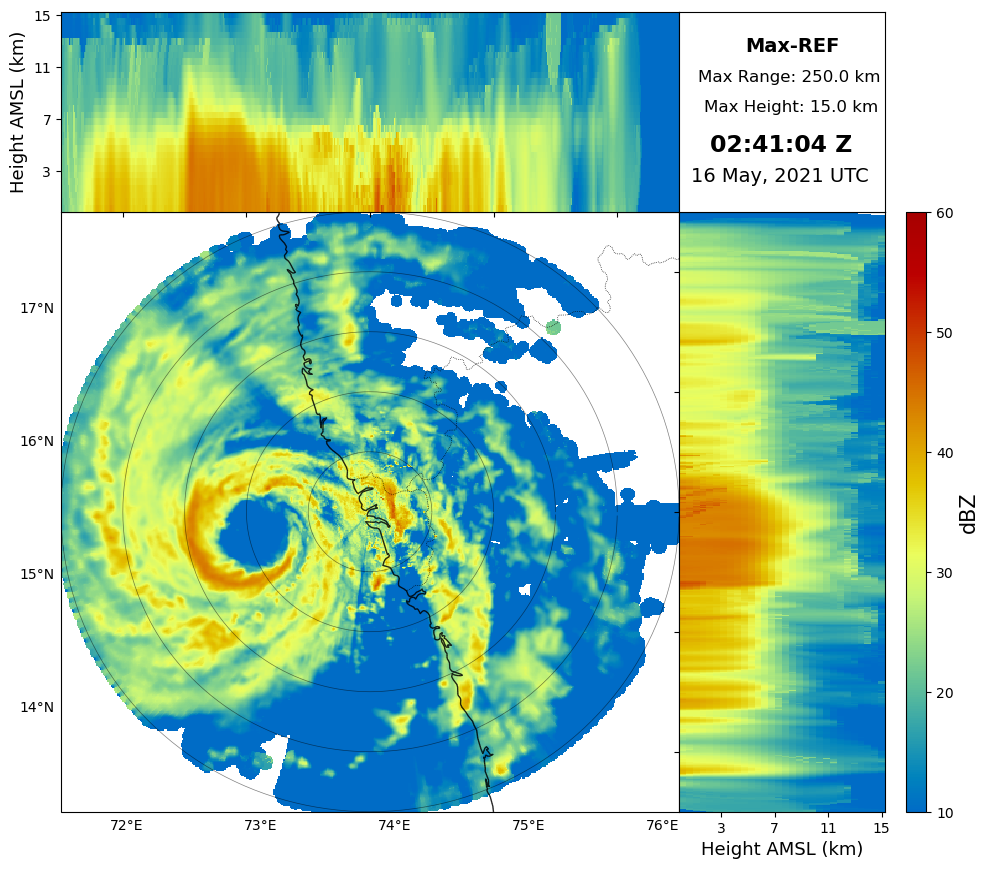

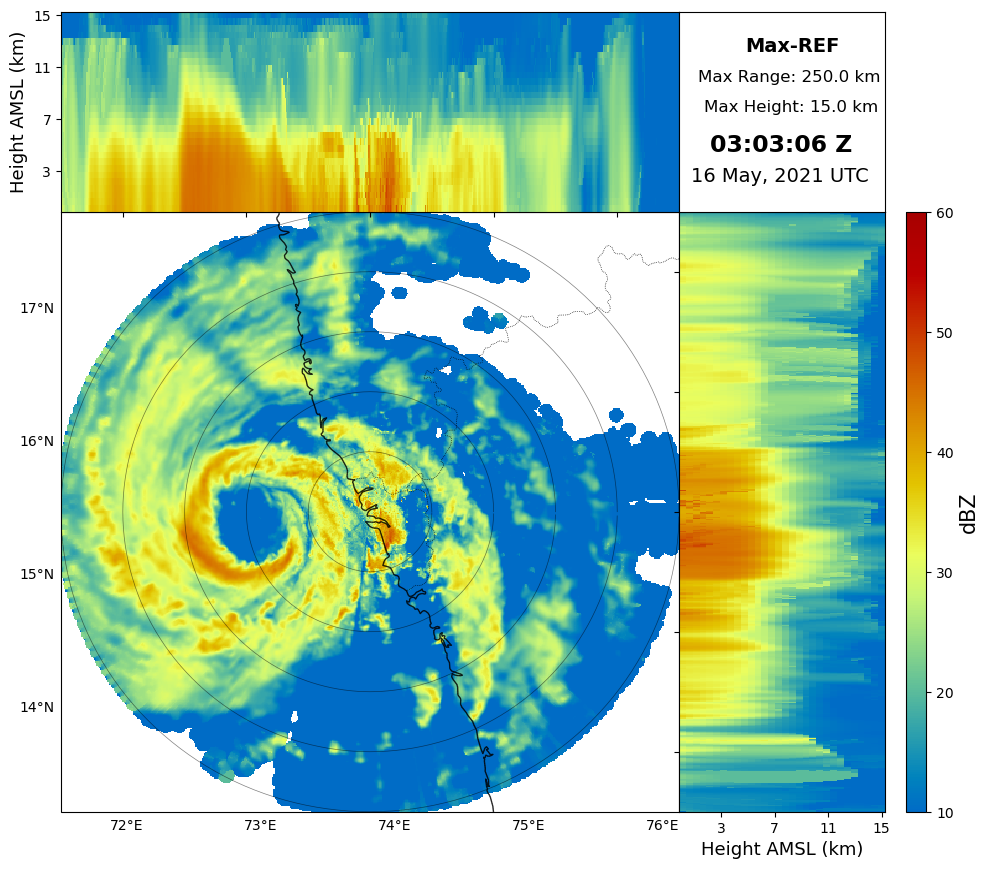

In [8]:

for file in files:
    grid = pyart.io.read_grid(file)
    pcf.plot_cappi(grid, "REF",
                   cmap="pyart_HomeyerRainbow", #optional
                   crosshair=False, #optional
                   savedir=None, #optional
                   show_figure=True, #optional
    )

In [9]:
for file in files:
    grid = pyart.io.read_grid(file)
    pcf.plot_cappi(grid, "REF",
                   cmap="pyart_HomeyerRainbow", #optional
                   crosshair=False, #optional
                   savedir=out, #optional
                   show_figure=False, #optional
    )

...............................
Plotting Max-REF 20210516024104
...............................

Figure(s) saved as /Users/syed44/Downloads/Git_Stuff/imd_temp_radar/out//Max-REF_GOA_20210516024104.png
...............................
Plotting Max-REF 20210516030306
...............................

Figure(s) saved as /Users/syed44/Downloads/Git_Stuff/imd_temp_radar/out//Max-REF_GOA_20210516030306.png
